<a href="https://colab.research.google.com/github/LVanessaS/Netflix/blob/main/Netlix_limpieza_y_transformaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#En este notebook se realizar√° la limpieza y transformaci√≥n de datos del dataset:
#https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization



# ***NETFLIX - LIMPIEZA DE DATOS***

**1. EL PROBLEMA DEL NEGOCIO**



*   ¬øCu√°ntos valores nulos encontr√°s en los datos? ¬øLos puedes eliminar?
*  ¬øCu√°ntos valores incompletos encontr√°s en los datos? ¬øLos puedes reemplazar?
*   ¬øPod√©s eliminar columnas que no te aportan informaci√≥n? ¬øCu√°les son? ¬øPor qu√© las eliminar√≠as?
*   ¬øQu√© tipo de dato es la columna ‚Äúrelease_year‚Äù? ¬øLo podes convertir a integer?
*   La columna ‚Äúlisted_in‚Äù contiene diferentes valores separados por coma, ¬øPod√©s crear una columna y quedarte con el primer valor?



**2. EL SET DE DATOS**

La informaci√≥n recolectada por la empresa Netflix se encuentra en un archivo CSV (netflix1.csv) con 8790 filas y 10 columnas.

Las columnas que contiene este archivo son:

1.   "show_id": id (categ√≥rica: "s1","s2",...)
2.   "Type": tipo de programa (categ√≥rica: "Movie", "TV Show")

1.   "title": t√≠tulo
2.   "director": estado civil

1.   "country": Pais
2.   "date_added": Fecha de adici√≥n

1.   "release_year": Fecha de estreno (string)
2.   "rating": Valuaci√≥n

1.   "duration": duraci√≥n
2.   "listed_in": Clasificaci√≥n








**3. UNA PRIMERA MIRADA AL DATASET**

In [1]:
#Importamos las librer√≠as
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Lectura del dataset
df = pd.read_csv('/content/netflix1.csv')

In [2]:
print(df.shape)
df.head()

(8790, 10)


show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dramas, TV Horror, TV Mysteries  
3                 Children & Family Movies, Comedies  
4   Dramas, Independent Movies, International Movies

In [ ]:
# Veamos las variables categ√≥ricas y las num√©ricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


Gracias a esta informaci√≥n, podemos responder la primera pregunta planteada:

*   ¬øCu√°ntos valores nulos encontr√°s en los datos? ¬øLos puedes eliminar?

Actualmente no hay valores nulos en ninguna columna, por lo que no es necesaria ninguna modificaci√≥n por el momento.

In [3]:
# Encontrar valores nulos en todo el DataFrame
valores_nulos = df.isnull()

# Resumen de valores nulos por columna
resumen_nulos = valores_nulos.any()

# Mostrar el DataFrame original y el resumen
print("DataFrame Original:")
df
print("\nResumen de Valores Nulos por Columna:")
resumen_nulos

DataFrame Original:

Resumen de Valores Nulos por Columna:


show_id         False
type            False
title           False
director        False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
dtype: bool

# **4. LIMPIEZA**

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones m√°s comunes:

*   Datos faltantes en algunas celdas
*   Columnas irrelevantes (que no responden al problema que queremos resolver)
*   Registros (filas) repetidos
*   Valores extremos (outliers) en el caso de las variables num√©ricas. Se deben analizar en detalle pues no necesariamente la soluci√≥n es eliminarlos
*   Errores tipogr√°ficos en el caso de las variables categ√≥ricas
*   Elemento de la lista


Al final de este proceso de limpieza deber√≠amos tener un set de datos √≠ntegro, listo para la fase de An√°lisis Exploratorio.

## 4.1 Datos faltantes

El dataframe tiene 8790 filas y 10 columnas, seg√∫n la informaci√≥n arrojada, no hay ning√∫n dato faltante en ninguna de las columnas.

## 4.2 Columnas irrelevantes

Vamos a responder la pregunta:

*   ¬øPod√©s eliminar columnas que no te aportan informaci√≥n? ¬øCu√°les son? ¬øPor qu√© las eliminar√≠as?

De momento la √∫nica columna poco relevante e √∫til para las preguntas que estamos resolviendo es "show_id", no nos brinda informaci√≥n relevante.




In [4]:
df = df[['type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in']]

In [6]:
# Conteo de los niveles en las diferentes columnas categ√≥ricas
cols_cat = ['type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in']

for col in cols_cat:
  print(f'Columna¬†{col}: {df[col].nunique()} subniveles')

Columna¬†type: 2 subniveles
Columna¬†title: 8787 subniveles
Columna¬†director: 4528 subniveles
Columna¬†country: 86 subniveles
Columna¬†date_added: 1713 subniveles
Columna¬†release_year: 74 subniveles
Columna¬†rating: 14 subniveles
Columna¬†duration: 220 subniveles
Columna¬†listed_in: 513 subniveles


Ninguna columna cuenta con valor √∫nico.

Columna 'Country' no aporta nada

## 4.3 Registros (filas) repetidas

In [7]:
print(f'Tama√±o del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tama√±o del set despu√©s de eliminar las filas repetidas: {df.shape}')

Tama√±o del set antes de eliminar las filas repetidas: (8790, 9)
Tama√±o del set despu√©s de eliminar las filas repetidas: (8787, 9)


## 4.4 Valores extremos

No siempre se deben eliminar los outliers porque dependiendo de la variable num√©rica analizada estos pueden contener informaci√≥n importante.

Creemos gr√°ficas tipo "boxplot" de las columnas num√©ricas, de hecho, la √∫nica variable num√©rica es "release_year", esta columna almacena el a√±o de publicaci√≥n de cada programa. Esto responde la pregunta:

*   ¬øQu√© tipo de dato es la columna ‚Äúrelease_year‚Äù? ¬øLo podes convertir a integer?


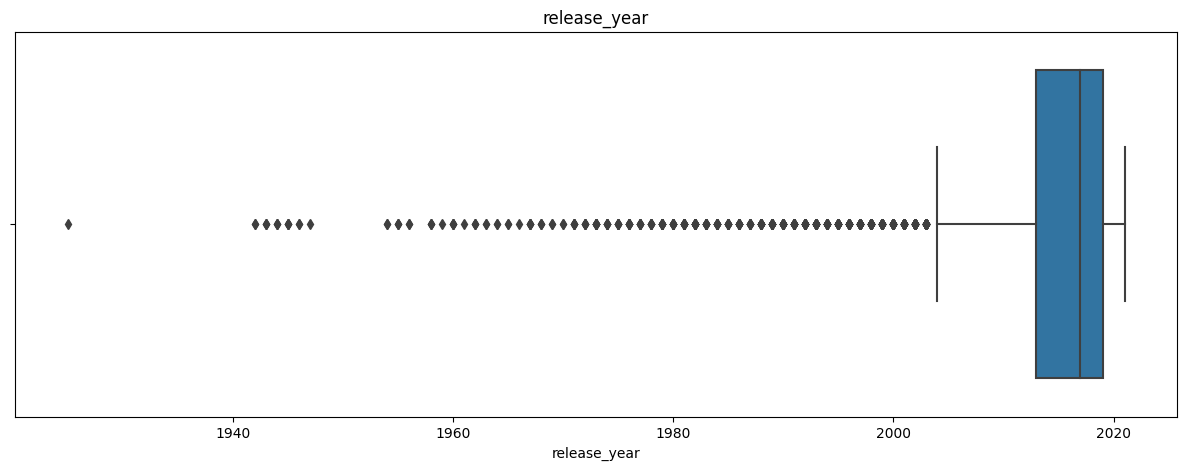

In [8]:
# Generar gr√°ficas individuales pues las variables num√©ricas
# est√°n en rangos diferentes
cols_num = ['release_year']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax)
    ax.set_title(col)

Si bien es cierto que hay valores de estreno muy antiguos, estos no representan necesariamente un error en la data.

## 4.5 Errores tipogr√°ficos

Antes de iniciar la validaci√≥n de errores tipogr√°ficos vamos a transformar la columna: 'listed_in', y de paso vamos a responder la √∫ltima pregunta planteada:

*   La columna ‚Äúlisted_in‚Äù contiene diferentes valores separados por coma, ¬øPod√©s crear una columna y quedarte con el primer valor?

In [9]:
# Divide los valores por comas y aplica explode
df[['listed_in_1','listed_in_2','listed_in_3']] = df['listed_in'].str.split(',', expand=True)



Utilizando la funci√≥n .split() fuimos capaces de separar la columna en tres diferentes columnas, y finalmente podemos quedarnos con el primer valor.

In [11]:
df = df[[
"type",
"title",
"director",
"country",
"date_added",
"release_year",
"rating" ,
"duration" ,
"listed_in",
"listed_in_1"]]

En una variable categ√≥rica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecer√≠an diferentes.

Se deben unificar estos sub-niveles

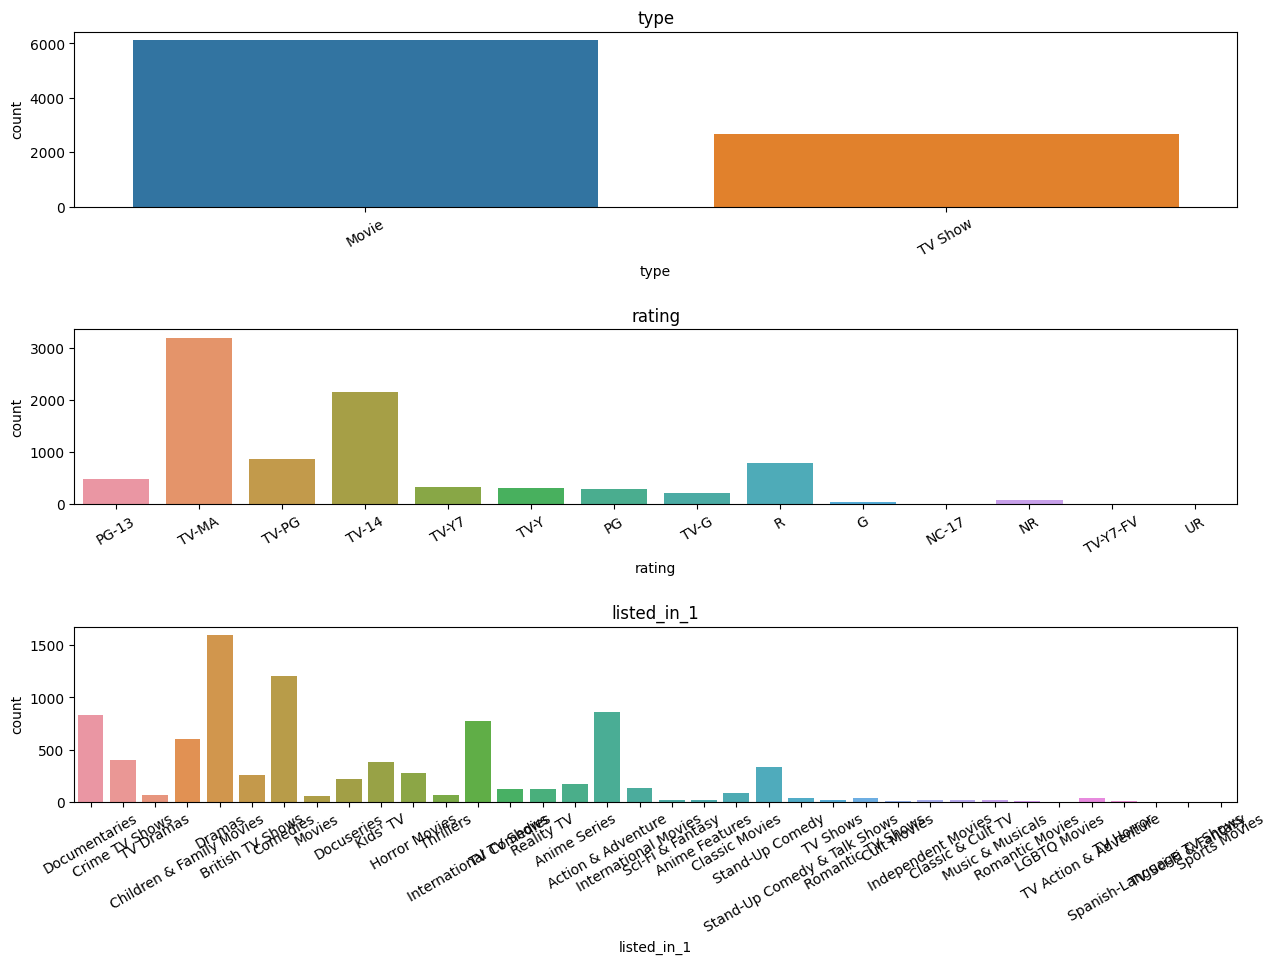

In [18]:
# Graficar los subniveles de cada variable categ√≥rica
cols_cat = ['type', 'rating', 'listed_in_1']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,10))
fig.subplots_adjust(hspace=0.7)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos de forma diferente, por lo que vamos a reemplazar estos nombres.

In [ ]:
# listed_in_1: unificar Dramas, Comedies y Sci-Fi & Fantasy. y administrative

df['listed_in_1'] = df['listed_in_1'].str.replace('TV Dramas','Dramas', regex=True)
df['listed_in_1'] = df['listed_in_1'].str.replace('TV Comedies','Comedies', regex=False)
df['listed_in_1'] = df['listed_in_1'].str.replace('TV Sci-Fi & Fantasy','Sci-Fi & Fantasy', regex=False)


Finalizamos la limpieza y transformaci√≥n de nuestra data!!! ü•≥